importing library
Loading datasets

In [65]:
import os
import pandas as pd

loc = '/home/kali/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
files = os.listdir(loc)
data = pd.DataFrame(columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'])
for i in files:
    tempdata = pd.read_csv(loc + '/%s'%i)
    tempdata['Months'] = i.split('_')[1]
    data = pd.concat([tempdata,data])


filtering and cleaning data

In [66]:
import numpy as np
data = data.dropna()
dicts = dict(zip(['January','February','March','April','May','June','July','August','September','October','November','December'],np.arange(1,13)))
data = data.replace(dicts)
data = data.rename(columns=dict(zip(['Order ID' ,'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address'],['OID', 'qtord', 'peach','odate','padd'])))


adding some columns

In [67]:
data = data[data.odate != 'Order Date']
data['qtord'] = pd.to_numeric(data['qtord'])
data['peach'] = pd.to_numeric(data['peach'])
def city(name):
    return name.split(',')[1]
def state(name):
    return (name.split(',')[2]).split(' ')[1]
data['city'] = data.padd.apply(lambda x: f'{city(x)} ({state(x)})')
data['sales'] = data.qtord * data.peach
sales = data.groupby(by = 'Months').sum().sales.sort_values(ascending=False)

Data visualization

<AxesSubplot:title={'center':'Income in Months'}, xlabel='Months', ylabel='Rupees'>

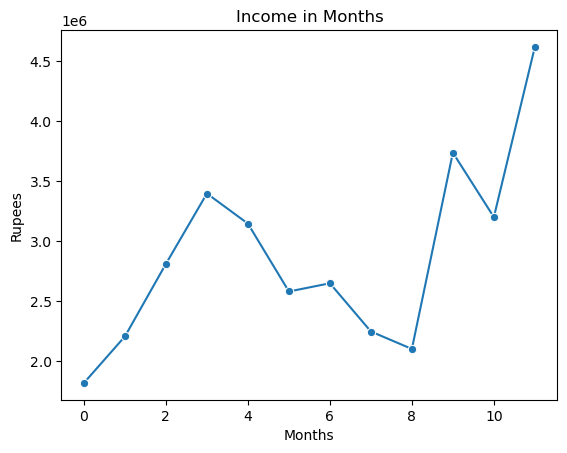

In [68]:
import matplotlib.pyplot as plt
plt.ylabel('Rupees')
plt.title('Income in Months')
import seaborn as se
# se.barplot(x=sales.index,y=sales.values)
se.lineplot(x=sales.index -1,y=sales.values,marker='o')

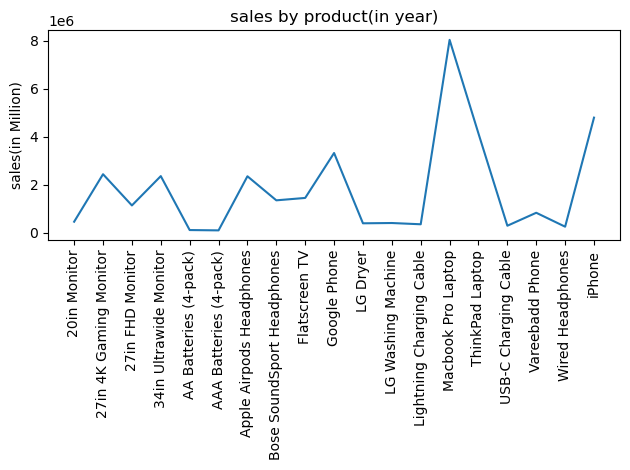

In [69]:
product = data.groupby(by = ['Product']).sum().sales
se.lineplot(x= np.arange(1,len(product)+1),y=product.values)
plt.xticks(ticks=np.arange(1,len(product)+1),rotation='vertical',labels = product.index)
plt.title('sales by product(in year)')
plt.ylabel('sales(in Million)')
plt.tight_layout()


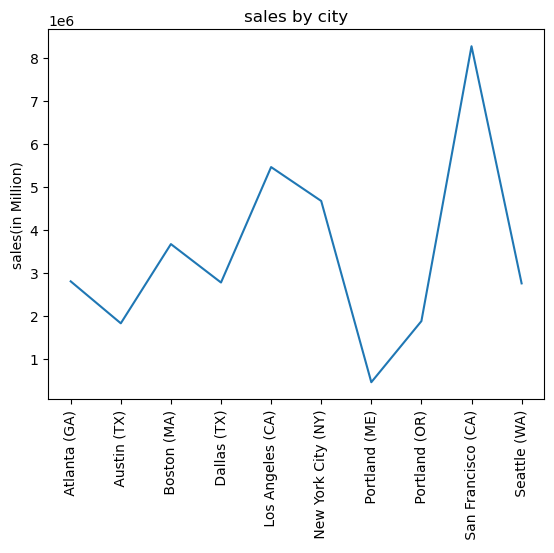

,OID,Product,qtord,peach,odate,padd,Months,city,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95
...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11,Los Angeles (CA),5.98
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11,Austin (TX),11.95
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11,Boston (MA),14.95
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11,Boston (MA),2.99


In [70]:
saless = data.groupby('city').sales.sum()
se.lineplot(x=np.arange(1,len(saless)+1),y=saless.values)
plt.xticks(ticks=np.arange(1,len(saless)+1),labels= saless.index,rotation = 'vertical')
plt.title('sales by city')
plt.ylabel('sales(in Million)')
plt.show()
data


In [71]:
data = data[data.OID.duplicated(keep = False)]
data['mul'] = data.groupby('OID')['Product'].transform(lambda x : ','.join(x))
data = data[['OID','mul']].drop_duplicates()


/tmp/ipykernel_2416/1428062155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mul'] = data.groupby('OID')['Product'].transform(lambda x : ','.join(x))


In [63]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in data['mul']:
    lis = row.split(',')
    count.update(Counter(combinations(lis,2)))
count.most_common(10)
data.shape

(7136, 2)